# CHESS DATA - Machine Learning

TEAM: Abraham Borg, Sarom Thin, Mehar Rekhi, Cristian Vazquez

We will create and train a model. The model will try to predict whether or not White wins a game.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_text
import graphviz 
import sys
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

# switch to seaborn default stylistic parameters
# see the very useful https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set()
sns.set_context('notebook')   
# sns.set_context('paper')  # smaller
# sns.set_context('talk')   # larger

# change default plot size
rcParams['figure.figsize'] = 10,8

Get PKL file with chess data from this link, https://github.com/abecsumb/DataScienceProject/

In [2]:
# read pkl file from local folder. The file contains the dataframe.
chess_data = pd.read_pickle('https://github.com/abecsumb/DataScienceProject/blob/main/chess_data_ML.pkl?raw=true', compression = 'zip')

In [3]:
openings_white = pd.read_pickle('https://github.com/abecsumb/DataScienceProject/blob/main/openings_white.pkl?raw=true', compression = 'zip')

In [4]:
openings_black = pd.read_pickle('https://github.com/abecsumb/DataScienceProject/blob/main/openings_black.pkl?raw=true', compression = 'zip')

In [5]:
# combine into one DF
chess_data = pd.concat([chess_data, openings_white], axis = 1)
chess_data = pd.concat([chess_data, openings_black], axis = 1)

In [6]:
chess_data.head()

,Date,Game Result,W-ELO,B-ELO,Num Moves,W1,B1,W2,B2,W3,B3,W4,B4,W5,B5,W6,B6,W7,B7,W8,B8,W9,B9,W10,B10,W11,B11,W12,B12,W13,B13,W14,B14,W15,B15,W16,B16,W17,B17,W18,B18,W19,B19,W20,B20,W21,B21,W22,B22,W23,B23,W24,B24,W25,B25,W26,B26,W27,B27,W28,B28,W29,B29,W30,B30,W31,B31,W32,B32,W33,B33,W34,B34,W35,B35,W36,B36,W37,B37,W38,B38,W39,B39,W40,B40,W41,B41,W42,B42,W43,B43,W44,B44,W45,B45,W46,B46,W47,B47,W48,B48,W49,B49,W50,B50,W51,B51,W52,B52,W53,B53,W54,B54,W55,B55,W56,B56,W57,B57,W58,B58,W59,B59,W60,B60,W61,B61,W62,B62,W63,B63,W64,B64,W65,B65,W66,B66,W67,B67,W68,B68,W69,B69,W70,B70,W71,B71,W72,B72,W73,B73,W74,B74,W75,B75,W1-Numeric,W2-Numeric,W3-Numeric,W4-Numeric,W5-Numeric,W6-Numeric,W7-Numeric,W8-Numeric,B1-Numeric,B2-Numeric,B3-Numeric,B4-Numeric,B5-Numeric,B6-Numeric,B7-Numeric,B8-Numeric
Game1,2000,1,2851,2555,147,d4,d5,c4,e6,Nc3,Nf6,cxd5,exd5,Bg5,c6,Qc2,Be7,e3,Nbd7,Bd3,O-O,Nge2,Re8,O-O,Nf8,f3,Ng6,Rad1,h6,Bxf6,Bxf6,Bxg6,fxg6,e4,g5,e5,Be7,f4,gxf4,Nxf4,Rf8,Ng6,Rxf1+,Rxf1,Be6,Ne2,Qd7,h4,Re8,Ng3,Bf7,Nxe7+,Rxe7,Nf5,Re6,Nd6,Bg6,Qc3,Rxd6,exd6,Qxd6,Qa3,Qb8,Qe7,Qg3,Rf3,Qg4,Qf8+,Kh7,Qf4,Qd7,Rg3,Be4,Qe5,Qf7,h5,Qd7,b4,a6,a4,Kg8,a5,Kh7,Kf2,Kg8,Qb8+,Kh7,Qf8,Bc2,Qf4,Be4,Qe5,Kg8,Ke3,Kh7,Ke2,Kg8,Qb8+,Kh7,Qf8,Bc2,Kd2,Be4,Kc1,Qc7,Rg4,Qd7,Rf4,Bxg2,Qf5+,Qxf5,Rxf5,Kg8,d2,h3,f4,e6,e3,f7,f5,f8,e5,e8,f4,f7,g4,e8,g3,f7,f4,e8,f5,xh5,e6,g6,e3,c2,f3+,g8,5,xb5,xd5,4,c4,3,c3,5,5,4,f4,5,6,<NA>,<NA>,<NA>,16,35,36,157,30,225,440,28,16,64,55,214,280,30,159,327
Game2,2000,1,2851,2544,45,e4,c5,Nf3,Nc6,Bb5,d6,c3,Nf6,Qe2,e5,d4,exd4,cxd4,a6,e5,Nd5,exd6+,Be6,Bxc6+,bxc6,dxc5,Qa5+,Bd2,Qxc5,O-O,Kd7,Na3,Bxd6,Rab1,Bf5,Rbc1,Rhe8,Qd1,Qa7,Nc4,Bc7,Bc3,f6,Nd4,Be6,Nxc6,Kxc6,Bd4,Qb8,Qa4+,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,18,18,8,151,168,350,422,557,14,23,122,91,306,406,427,205
Game3,2000,1,2851,2748,90,d4,d5,c4,c6,Nc3,Nf6,Nf3,dxc4,a4,Bf5,Ne5,Nbd7,Nxc4,Qc7,g3,e5,dxe5,Nxe5,Bf4,Nfd7,Bg2,g5,Ne3,gxf4,Nxf5,O-O-O,Qc2,Ng4,a5,fxg3,hxg3,a6,Ra4,Ndf6,Ne4,Nxe4,Bxe4,h5,Kf1,Kb8,Kg2,Be7,Nxe7,Qxe7,Bf3,Ne5,Bxh5,Qe6,Qc3,f6,Rah4,Qf5,Bf3,Rxh4,Rxh4,Qb1,Rh1,Rd1,Rxd1,Qxd1,b4,Kc7,Qc5,Qd6,Qxd6+,Kxd6,Be4,Nc4,Bd3,Nb2,f4,Nd1,g4,Ne3+,Kf3,Nd5,Ke4,Nxb4,Bc4,c5,g5,fxg5,fxg5,Ke7,Kf5,Nc2,Ke5,Ne3,Be6,c4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,16,35,36,72,215,145,226,585,16,54,55,200,25,132,304,562
Game4,2000,1,2851,2637,51,e4,e5,Nf3,Nf6,Nxe5,d6,Nf3,Nxe4,d4,d5,Bd3,Be7,O-O,Nc6,c4,Nb4,Be2,O-O,Nc3,Bf5,a3,Nxc3,bxc3,Nc6,Re1,Bf6,Bf4,Ne7,Qb3,b6,cxd5,Nxd5,Be5,Bg4,Rad1,Be7,h3,Bh5,g4,Bg6,Bg3,Nf6,Ne5,Ne4,Bf3,Nxg3,Nc6,Qd6,Nxe7+,Kh8,Bxa8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,18,18,57,72,241,18,264,526,18,30,122,112,293,30,168,169
Game5,2000,1,2851,2751,69,e4,e6,d4,d5,Nc3,Nf6,Bg5,dxe4,Nxe4,Nbd7,Nf3,Be7,Nxf6+,Bxf6,h4,O-O,Bd3,c5,Qe2,cxd4,Qe4,g6,O-O-O,Qa5,Bxf6,Nxf6,Qxd4,Nh5,a3,Rd8,Qe3,Bd7,g4,Nf6,Qf4,Nd5,Qh6,Nf6,Ng5,Bc6,Bxg6,hxg6,Nxe6,fxe6,Qxg6+,Kh8,

In [7]:
chess_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156238 entries, Game1 to Game156371
Columns: 171 entries, Date to B8-Numeric
dtypes: int16(11), int32(4), int64(1), int8(5), string(150)
memory usage: 187.6+ MB


### kNN REGRESSION

In [8]:
predictors = ['W1-Numeric', 'W2-Numeric', 'W3-Numeric', 'W4-Numeric', 'W5-Numeric', 'W6-Numeric', 'W7-Numeric', 'W8-Numeric', 'W-ELO', 'B-ELO', 'Num Moves']
target = 'Game Result'
X = chess_data[predictors].values
y = chess_data[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [9]:
#
# knn classification
#

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
# for classifiers, score is accuracy
accuracy = knn.score(X_test, y_test)

# verify
predicted = knn.predict(X_test)
actual = y_test
np.mean(actual == predicted)

# baseline
baseline_accuracy = pd.Series(y_train).value_counts().iloc[0] / y_train.size
baseline_accuracy

0.563570534682219

In [10]:
# knn regression; predict Game Result
reg = KNeighborsRegressor(n_neighbors = 5)
reg.fit(X_train, y_train)

# make predictions
predicted = reg.predict(X_test)
rmse = np.sqrt(np.mean((y_test - predicted)**2))

In [11]:
# compare first ten predictions with first ten correct values
print(predicted[:10].astype(int))
print(y_test[:10])

[1 0 0 0 0 0 0 0 1 0]
[1 0 0 1 1 0 1 0 1 0]


In [12]:
mse = ((predicted - y_test)**2).mean()
print('MSE: {0:.0f}'.format(mse))

MSE: 0


C:\Users\Abrah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


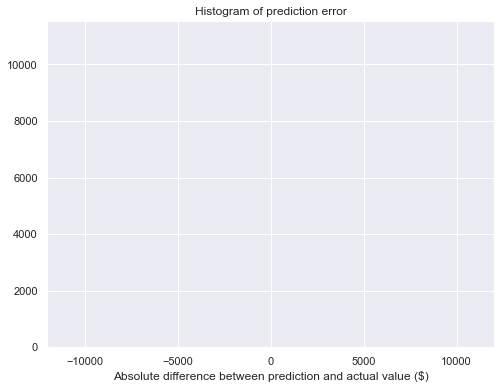

In [13]:
# plot absolute prediction error as a histogram
plt.figure(figsize=(8,6))
sns.distplot(predicted - y_test, kde=False)
plt.title('Histogram of prediction error')
plt.xlabel('Absolute difference between prediction and actual value ($)')
plt.xlim(-12000, 12000);

In [14]:
# verify
predicted = reg.predict(X_test)
actual = y_test
np.mean(actual == predicted)

0.21295991000601253

### kNN CLASSIFICATION

In [15]:
predictors = ['W1-Numeric', 'W2-Numeric', 'W3-Numeric', 'W4-Numeric', 'W5-Numeric', 'W6-Numeric', 'W7-Numeric', 'W8-Numeric', 'W-ELO', 'B-ELO', 'Num Moves']
target = 'Game Result'
X = chess_data[predictors].values
y = (chess_data[target] == 1).values

In [16]:
# test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [17]:
# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# look at the scaled data
print(X_train[:10,:])

[[-0.57571567 -0.91090946 -0.75034151  1.44876788 -1.34482181  0.17923874
   1.16407148  0.47671437  1.16773788  0.63507929 -0.65088511]
 [ 0.59088405 -0.91090946  0.82091486 -0.20808593 -0.61932016 -1.21537548
   1.34383721  0.16353264  1.01440929  0.51571774 -0.17736796]
 [ 0.59088405  1.5016358  -0.75034151  1.00003664 -0.40051808 -0.31988635
  -1.34622857 -0.04183243  1.14047946  0.90449537  0.21722966]
 [ 0.59088405 -0.91090946 -1.59881994 -0.05275588  0.99290572  0.83984548
  -1.53241451 -1.56666808  0.87811722  1.14662881 -0.72980463]
 [ 0.59088405 -0.91090946  0.56951384  1.00003664  1.16564421  1.17014884
  -1.41685083  0.02491121  0.65664259  0.34520124 -1.12440225]
 [ 0.00758419  0.55385016 -0.75034151  1.15536669 -0.40051808  0.26731964
   1.43372008 -1.2637546   1.50506077  1.13980815 -0.9665632 ]
 [ 0.59088405 -0.91090946 -1.63024507 -0.05275588  0.71652414 -0.99517323
   1.16407148 -0.13938084  0.62256957  0.9079057  -1.51899987]
 [ 0.00758419 -0.91090946  1.07231588 -1.

In [19]:
# build a kNN classifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
# make predictions
predictions = clf.predict(X_test)

In [21]:
# compare first ten predictions with first ten correct values
print(predictions[:10])
print(y_test[:10])

[ True  True  True  True  True  True False  True False  True]
[ True  True  True False  True  True  True  True  True  True]


In [22]:
accuracy = (predictions == y_test).mean()
print('accuracy: {0:.3f}'. format(accuracy))

accuracy: 0.648


In [23]:
# try with k = 7 instead of the default value of 5
clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = (predictions == y_test).mean()
print('accuracy: {0:.3f}'. format(accuracy))

accuracy: 0.659


### kNN ANOMALY DETECTION

In [24]:
#
# kNN anomaly detector
#

# compute distance between two n-dimensional points
def edist(x,y):
    return np.sqrt(np.sum((x-y)**2))

# return a distance matrix based on columns of float matrix x
def dist(x):
    m = x.shape[0]
    dm = np.zeros((m,m))
    for i in range(m):
        for j in range(i,m):
            dm[i,j] = edist(x[i,:], x[j,:])
            dm[j,i] = dm[i,j]
    return dm

In [25]:
# return indexes of anomalous elements of data frame df
# df - a data frame in which all columns are numeric
# k  - k parameter of KNN
# threshold - number of standard deviations past mean distance
#      to be considered an anomaly
def knn_anomalies(df, k = 3, threshold = 3):
    # scale the data and compute distance matrix
    x = df.apply(zscore).values
    dm = dist(x)
    
    # Compute and return an array containing the
    # row numbers of data frame df for which the distance to
    # the kth nearest neighbor is more than 'threshold' number
    # of standard deviations above the mean of the distances.
    # Refer to lecture slides for hints.
    # Pseudocode:
    # 1. for each row, compute distance to kth neareset neighbor
    # 2. use zscale-normalization on the distances
    # 3. get the indexes of the scaled distances that are larger than threshold
        
    sorted_distances = np.apply_along_axis(np.sort, 1, dm)
    dist_to_k_nearest = sorted_distances[:,k]
    
    dist_std = np.std(dist_to_k_nearest)
    dist_mean = np.mean(dist_to_k_nearest)
    dist_scaled = (dist_to_k_nearest - dist_mean)/dist_std
    
    anomaly_indexes = np.where(dist_scaled > threshold)
    return anomaly_indexes

In [29]:
#
# test the anomaly detector
#

# compute the anomalies
features = ['W1-Numeric', 'W2-Numeric', 'W3-Numeric', 'W4-Numeric', 'W5-Numeric', 'W6-Numeric', 'W7-Numeric', 'W8-Numeric', 'W-ELO', 'B-ELO', 'Num Moves']
anoms = knn_anomalies(chess_data[features], k = 7, threshold = 5)

# add new 'Anomaly' column
x = np.full(len(chess_data), False)
x[anoms] = True
chess_data['Anomaly'] = x

# plot,showing anomalies
sns.scatterplot('W-ELO', 'Game Result', data = chess_data, hue='Anomaly', style='Private')

MemoryError: Unable to allocate 182. GiB for an array with shape (156238, 156238) and data type float64

### LINEAR REGRESSION

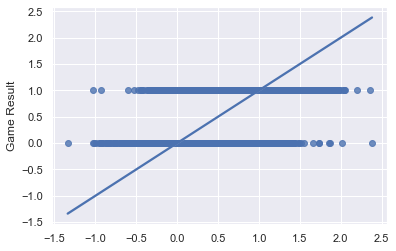

In [30]:
X = chess_data[['W1-Numeric', 'W2-Numeric', 'W3-Numeric', 'W4-Numeric', 'W5-Numeric', 'W6-Numeric', 'W7-Numeric', 'W8-Numeric', 'W-ELO', 'B-ELO', 'Num Moves']].values #feature
y = chess_data['Game Result'].values    #target
 
#fit the model and make predictions from the training data 
regr = LinearRegression()
regr.fit(X,y)
fit = regr.predict(X)

sns.regplot(x = fit, y = 'Game Result', data = chess_data)
plt.show()

<AxesSubplot:xlabel='Game Result'>

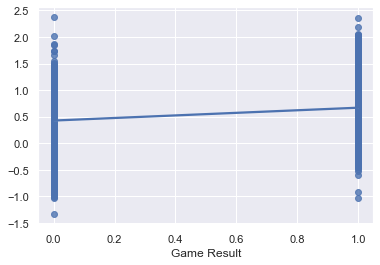

In [31]:
sns.regplot(x = 'Game Result', y = fit, data = chess_data)

In [32]:
print("W1-Numeric: {:.2f}".format(regr.coef_[0]))
print("W2-Numeric: {:.2f}".format(regr.coef_[1]))
print("W3-Numeric: {:.2f}".format(regr.coef_[2]))
print("W4-Numeric: {:.2f}".format(regr.coef_[3]))
print("W5-Numeric: {:.2f}".format(regr.coef_[4]))
print("W6-Numeric: {:.2f}".format(regr.coef_[5]))
print("W7-Numeric: {:.2f}".format(regr.coef_[6]))
print("W8-Numeric: {:.2f}".format(regr.coef_[7]))
print("W-ELO: {:.2f}".format(regr.coef_[8]))
print("B-ELO: {:.2f}".format(regr.coef_[9]))
print("Num Moves: {:.2f}".format(regr.coef_[10]))

W1-Numeric: 0.00
W2-Numeric: 0.00
W3-Numeric: -0.00
W4-Numeric: -0.00
W5-Numeric: -0.00
W6-Numeric: 0.00
W7-Numeric: 0.00
W8-Numeric: -0.00
W-ELO: 0.00
B-ELO: -0.00
Num Moves: -0.00


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
regr.fit(X_train, y_train)

LinearRegression()

In [34]:
#Accuracy with predictors
r1 = regr.score(X_train, y_train) 
print('R-squared : {:.2f}'.format(r1))

# Test accuracy without opening moves 
predictions = ['W-ELO', 'B-ELO', 'Num Moves']
target = 'Game Result'
X = chess_data[predictions].values
y = chess_data[target].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.30, random_state = 42) 
regr2 = LinearRegression()
regr2.fit(X_train2, y_train2)

r2 = regr2.score(X_train2, y_train2) 
print('R-squared : {:.2f}'.format(r2))

R-squared : 0.24
R-squared : 0.24


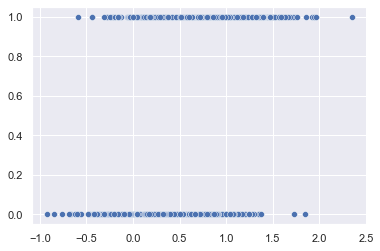

In [35]:
predicted = regr.predict(X_test)
sns.scatterplot(x=predicted, y=y_test);

Intercept: 0.42
W1-Numeric coefficient: 0.001
B1-Numeric coefficient: -0.001
W2-Numeric coefficient: 0.000
B2-Numeric coefficient: -0.000
W3-Numeric coefficient: -0.000
B3-Numeric coefficient: 0.000
W-ELO coefficient: 0.001
B-ELO coefficient: -0.001
R-squared using score: 0.24


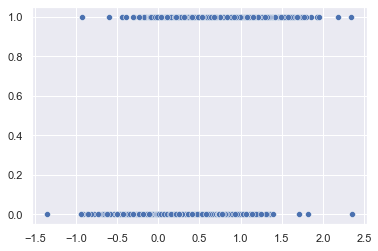

In [36]:
# use different predictors
#8.	Repeat steps 2-7 using a different pair of predictor variables.

predictions = ['W1-Numeric', 'B1-Numeric', 'W2-Numeric', 'B2-Numeric', 'W3-Numeric', 'B3-Numeric', 'W-ELO', 'B-ELO']
target = 'Game Result'
X = chess_data[predictions].values
y = chess_data[target].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.30, random_state = 42) 
reg1 = LinearRegression()
reg1.fit(X_train1, y_train1)

print('Intercept: {:.2f}'.format(reg1.intercept_)) 
print('W1-Numeric coefficient: {:.3f}'.format(reg1.coef_[0])) 
print('B1-Numeric coefficient: {:.3f}'.format(reg1.coef_[1])) 
print('W2-Numeric coefficient: {:.3f}'.format(reg1.coef_[2])) 
print('B2-Numeric coefficient: {:.3f}'.format(reg1.coef_[3])) 
print('W3-Numeric coefficient: {:.3f}'.format(reg1.coef_[4])) 
print('B3-Numeric coefficient: {:.3f}'.format(reg1.coef_[5])) 
print('W-ELO coefficient: {:.3f}'.format(reg1.coef_[6]))
print('B-ELO coefficient: {:.3f}'.format(reg1.coef_[7]))

r1 = reg1.score(X_train1, y_train1) 
print('R-squared using score: {:.2f}'.format(r1))

predicted = reg1.predict(X_test1)
sns.scatterplot(x=predicted, y=y_test1);

Using Polynomial Linear Regression: 0.46


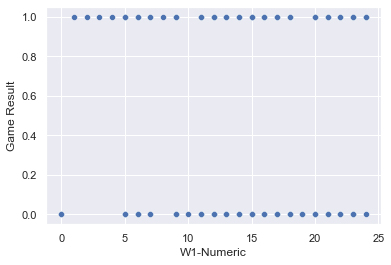

In [37]:
sns.scatterplot(data = chess_data, x = 'W1-Numeric', y = 'Game Result')

chess_data['W1-Numeric'] = chess_data['W1-Numeric']**2

predictors = ['W1-Numeric', 'B1-Numeric', 'W-ELO', 'B-ELO', 'Num Moves']
X = chess_data[predictors].values

# Make a model of polynomial features
pf = PolynomialFeatures(degree = 3, include_bias = False) 
pf.fit(X)
# Transform X, so it now has many more features
X_poly = pf.transform(X)

# Split the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_poly, y, test_size = 0.30, random_state = 42) 
reg.fit(X_train2, y_train2)

predicted2 = reg.predict(X_test2)
rsme2 = np.sqrt(((predicted2 - y_test2)**2).mean()) 

print('Using Polynomial Linear Regression: {:.2f}'.format(rsme2)) 

In [38]:
predictors = ['W7-Numeric','B7-Numeric', 'W8-Numeric', 'B8-Numeric', 'W-ELO', 'B-ELO', 'Num Moves']
target = 'Game Result'
X = chess_data[predictors].values
y = chess_data[target].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state = 42)

In [39]:
#fit the linear model 
regr=LinearRegression()
regr.fit(X_train, y_train)

#make predictions
predicted=regr.predict(X_test)

In [40]:
rmse=np.sqrt(((y_test - predicted)**2).mean())
print('RMSE 1: {:.2f}'.format(rmse)) 

RMSE 1: 0.43


In [41]:
#5.	Repeat steps 2-4, but this time use new randomly-generated test and
# training sets.  How much does the RMSE differ?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12) 
regr.fit(X_train, y_train)
predicted = regr.predict(X_test)
rsme = np.sqrt(((predicted - y_test)**2).mean()) 

print('RMSE 2: {:.2f}'.format(rsme)) 

RMSE 2: 0.43


In [42]:
sum = 0

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42) 
    regr.fit(X_train, y_train)
    predicted = regr.predict(X_test)
    sum += np.sqrt(((predicted - y_test)**2).mean()) 
    
print('Average: ', sum/100)

Average:  0.43131771076509745


### DECISION TREE REGRESSOR

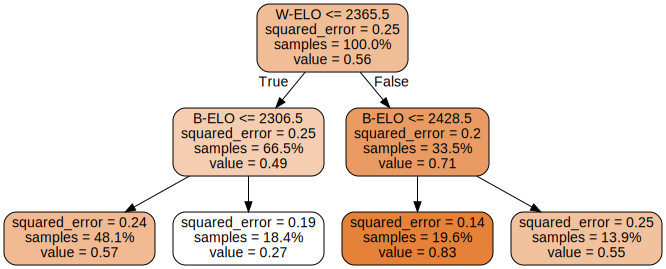

In [43]:
predictors = ['W1-Numeric', 'W-ELO', 'B-ELO', 'Num Moves']
target = 'Game Result'
X = chess_data[predictors].values
y = chess_data[target].values

# test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# train the model
reg = DecisionTreeRegressor(max_depth = 2)
reg.fit(X_train, y_train)

# view the tree
# conda install python-graphviz
dot_data = export_graphviz(reg, precision = 2,
                     feature_names = predictors,  
                     proportion = True,
                     filled = True, rounded = True)

# plot it
graph = graphviz.Source(dot_data)  
graph

In [44]:
r = export_text(reg, feature_names = predictors)
print(r)

|--- W-ELO <= 2365.50
|   |--- B-ELO <= 2306.50
|   |   |--- value: [0.57]
|   |--- B-ELO >  2306.50
|   |   |--- value: [0.27]
|--- W-ELO >  2365.50
|   |--- B-ELO <= 2428.50
|   |   |--- value: [0.83]
|   |--- B-ELO >  2428.50
|   |   |--- value: [0.55]



In [45]:
reg.get_depth()

2

In [46]:
reg.get_n_leaves()

4

In [47]:
y_predict = reg.predict(X_test)
errors = y_test - y_predict
rmse = np.sqrt((errors**2).mean())
rmse

0.46578614384808614

C:\Users\Abrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


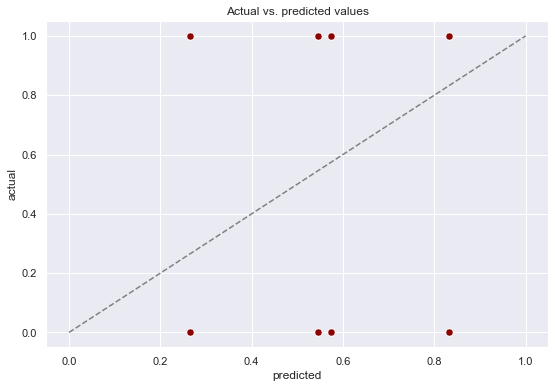

In [48]:
def plot_pred_actual(y_predict, y_test):
    plt.figure(figsize = (9,6))
    sns.scatterplot(y_predict, y_test, s = 50, color = 'darkred')
    biggest = np.concatenate([y_predict, y_test]).max()
    plt.plot([0, biggest], [0, biggest], color = 'grey', linestyle = 'dashed')
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.title('Actual vs. predicted values')

plot_pred_actual(y_predict, y_test)

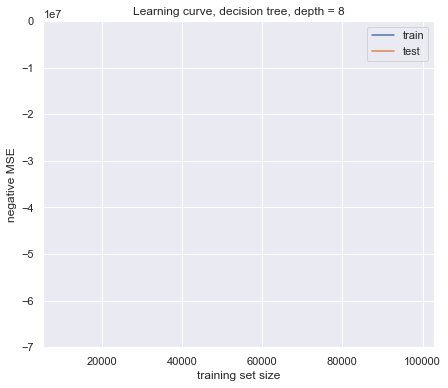

In [49]:
depth = 8
reg2 = DecisionTreeRegressor(max_depth = depth)
train_sizes, train_scores, test_scores = learning_curve(reg, X_train, y_train, cv=10, scoring = 'neg_mean_squared_error')
train_scores_mean = np.mean(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)

plt.figure(figsize = (7,6))
plt.plot(train_sizes, train_scores_mean, label = 'train')
plt.plot(train_sizes, test_scores_mean, label = 'test')
plt.title('Learning curve, decision tree, depth = {}'.format(depth))
plt.xlabel('training set size')
plt.ylabel('negative MSE')
plt.ylim(-7e7,0)
plt.legend()

#### NEW MODEL, TRY MORE PREDICTORS

C:\Users\Abrah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


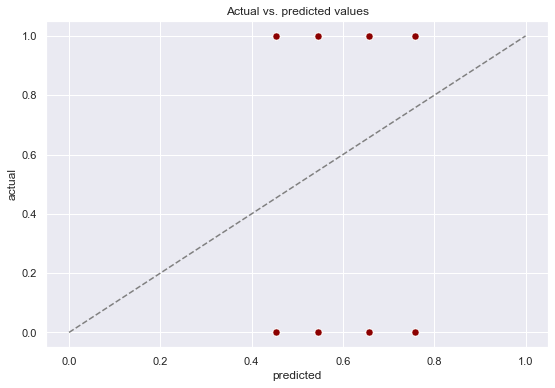

In [50]:
def build_data(chess_data, predictors, test_size = 0.3):
    target = 'Game Result'
    X = chess_data[predictors].values
    y = chess_data[target].values
    return train_test_split(X, y, test_size = test_size, random_state = 0)

# include white's first move
predictors = ['W1-Numeric', 'W2-Numeric', 'W3-Numeric', 'Num Moves','W-ELO', 'B-ELO']
df1 = pd.get_dummies(chess_data[predictors], columns = ['B-ELO'], drop_first = True)
X = df1.values
y = chess_data[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# train the model
reg3 = DecisionTreeRegressor(max_depth = 2)
reg3.fit(X_train, y_train)

y_predict = reg3.predict(X_test)

plot_pred_actual(y_predict, y_test)

Another model

In [51]:
def build_data(chess_data, predictors, test_size = 0.3):
    target = 'Game Result'
    X = chess_data[predictors].values
    y = chess_data[target].values
    return train_test_split(X, y, test_size = test_size, random_state = 0)

predictors = ['W1-Numeric', 'W2-Numeric', 'W3-Numeric', 'W4-Numeric', 'W5-Numeric', 'W6-Numeric', 'W7-Numeric','W8-Numeric', 'W-ELO', 'B-ELO', 'Num Moves']
df1 = pd.get_dummies(chess_data[predictors], columns = ['B-ELO'], drop_first = True)
X = df1.values
y = chess_data[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# train the model
reg4 = DecisionTreeRegressor(max_depth = 5)
reg4.fit(X_train, y_train)

y_predict = reg.predict(X_test)

plot_pred_actual(y_predict, y_test)

ValueError: X has 2085 features, but DecisionTreeRegressor is expecting 4 features as input.

### DECISION TREE CLASSIFIER

In [52]:
predictors = ['W1-Numeric', 'W-ELO', 'B-ELO', 'Num Moves']
target_names = ['Game Result']
X = chess_data[predictors].values
y = chess_data['Game Result'].values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

#
# train the model
#

# features are permuted randomly at each split, so the best
# fit found may vary if several splits are equally good
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [54]:
#
# plot the tree
#

# conda install python-graphviz
dot_data = export_graphviz(clf, precision = 2,
                     feature_names = predictors,  
                     proportion = True,
                     class_names = target_names,  
                     filled = True, rounded = True,  
                     special_characters = True)

# plot it
graph = graphviz.Source(dot_data)  
graph

IndexError: list index out of range

In [55]:
#
# show the fitted tree using text
#

r = export_text(clf, feature_names=predictors)
print(r)

|--- W-ELO <= 2365.50
|   |--- B-ELO <= 2306.50
|   |   |--- class: 1
|   |--- B-ELO >  2306.50
|   |   |--- class: 0
|--- W-ELO >  2365.50
|   |--- B-ELO <= 2428.50
|   |   |--- class: 1
|   |--- B-ELO >  2428.50
|   |   |--- class: 1



In [56]:
#
# other information about the fit
#

clf.get_depth()
clf.get_n_leaves()

# "the normalized total reduction of the criterion brought
# by that feature".  aka Gini importance.
# clf.feature_importances_

# clf

4

(array([ 8544.,     0.,     0.,     0.,  6406., 22840.,     0.,     0.,
            0.,  9082.]),
 array([0.26544406, 0.32210605, 0.37876804, 0.43543002, 0.49209201,
        0.54875399, 0.60541598, 0.66207796, 0.71873995, 0.77540194,
        0.83206392]),
 <BarContainer object of 10 artists>)

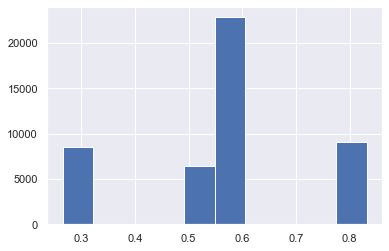

In [57]:
#
# make predictions
#

y_predict = clf.predict(X_test)

# accuracy
(y_predict == y_test).mean()

# predict probabilities -- many will be the same
y_predict_probs = clf.predict_proba(X_test)[:,1]
plt.hist(y_predict_probs)

In [58]:
from sklearn.metrics import confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
confusion_matrix(y_test, y_predict)

array([[ 6220, 14157],
       [ 2324, 24171]], dtype=int64)

C:\Users\Abrah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


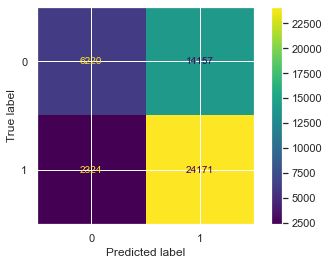

In [59]:
#a prettier approach
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  